In [241]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as pl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [242]:
df=pd.read_csv("insurance.csv")

## 1. EDA

In [243]:
df.shape

(1338, 7)

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [245]:
df.describe().T # if mean is close std, there will be outlier value. But there is not same situation at this dataset.

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


#### OrdinalEncoder

In [246]:
cat=df.select_dtypes("object").columns
cat

Index(['sex', 'smoker', 'region'], dtype='object')

In [247]:
from sklearn.preprocessing import OrdinalEncoder

In [248]:
enc=OrdinalEncoder()

In [249]:
df[cat]=enc.fit_transform(df[cat])

In [250]:
df[cat]

,sex,smoker,region
0,0.0,1.0,3.0
1,1.0,0.0,2.0
2,1.0,0.0,2.0
3,1.0,0.0,1.0
4,1.0,0.0,1.0
...,...,...,...
1333,1.0,0.0,1.0
1334,0.0,0.0,0.0
1335,0.0,0.0,2.0
1336,0.0,0.0,3.0


In [251]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [252]:
df.duplicated().sum()

1

In [253]:
df.drop_duplicates(inplace=True)

In [254]:
df.shape

(1337, 7)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

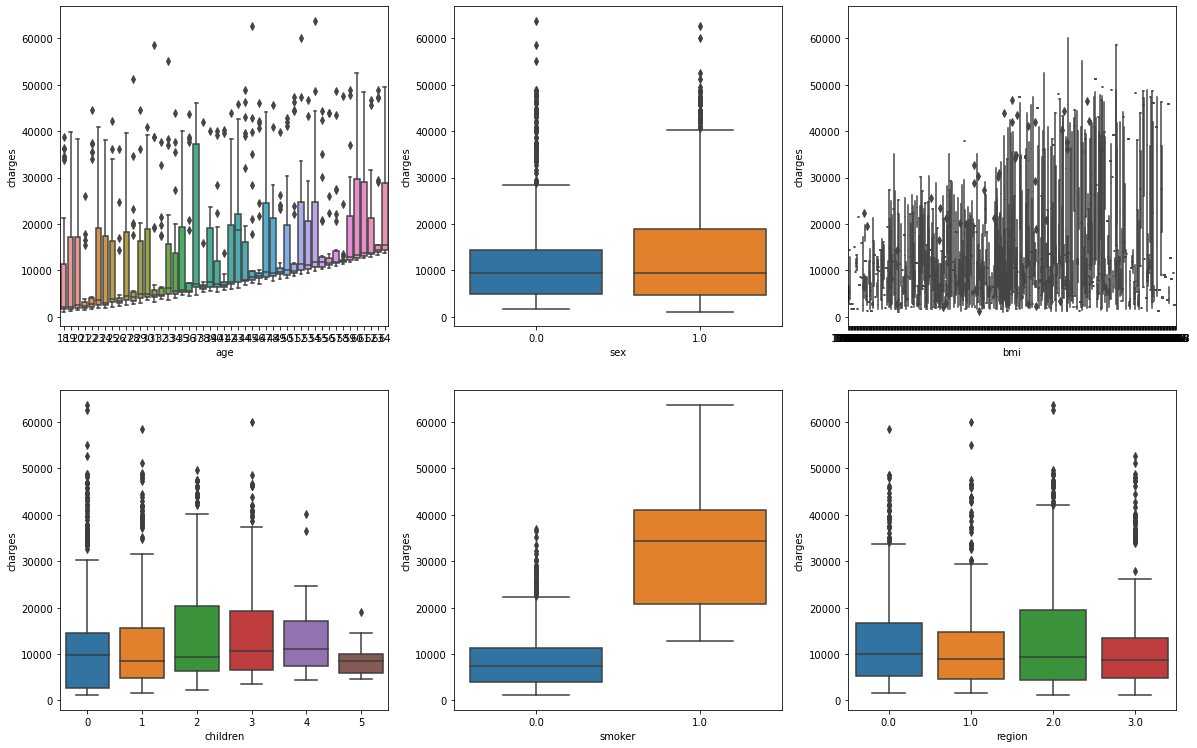

In [255]:
index=0
plt.figure(figsize=(20,20))
for i in df.columns:
    if i != "charges":
        index +=1
        plt.subplot(3,3,index)
        sns.boxplot(y="charges", x=df[i], data=df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

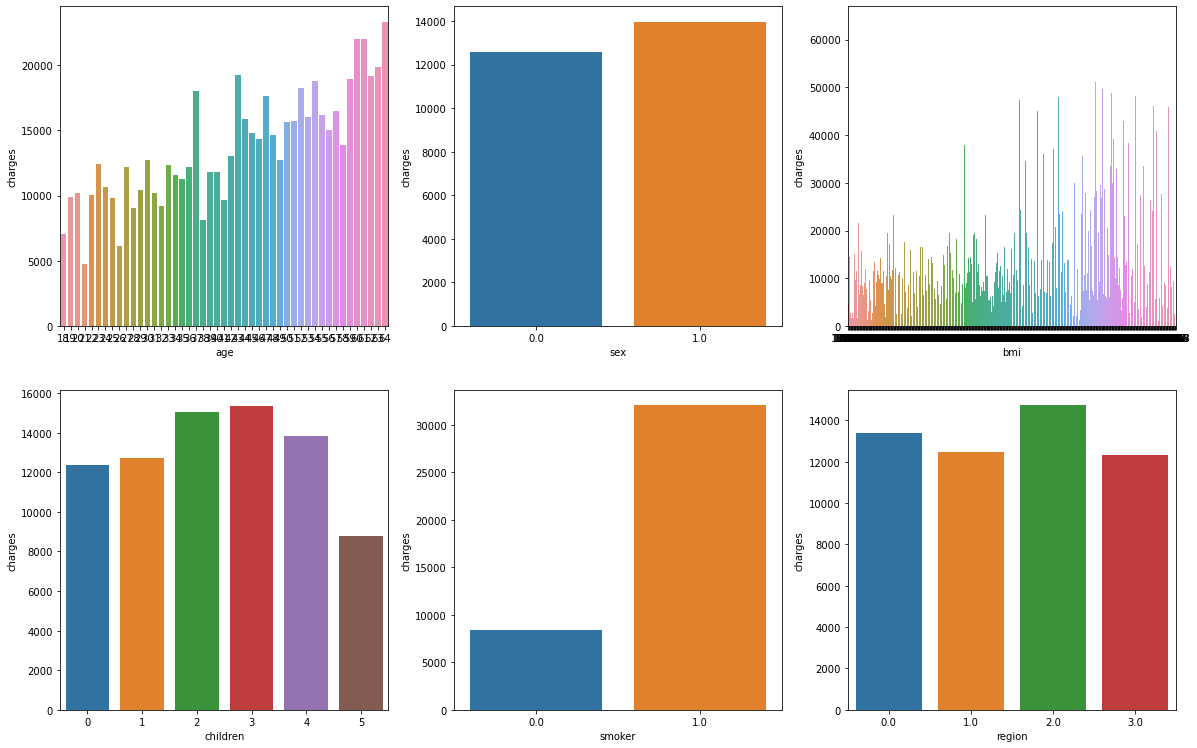

In [256]:
index=0
plt.figure(figsize=(20,20))
for i in df.columns:
    if i != "charges":
        index +=1
        plt.subplot(3,3,index)
        sns.barplot(y="charges", x=i, data=df, ci=False)

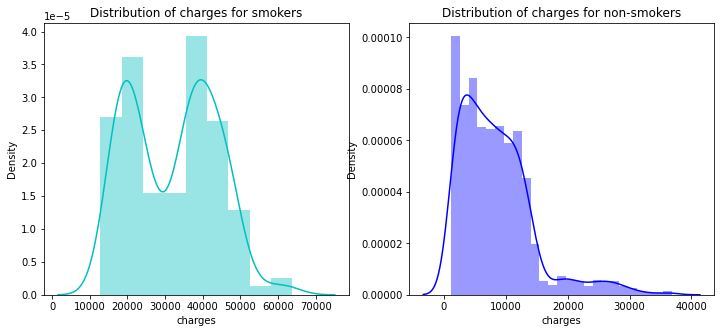

In [257]:
f= pl.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(df[(df.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers');

<IPython.core.display.Javascript object>

<Figure size 2160x2160 with 0 Axes>

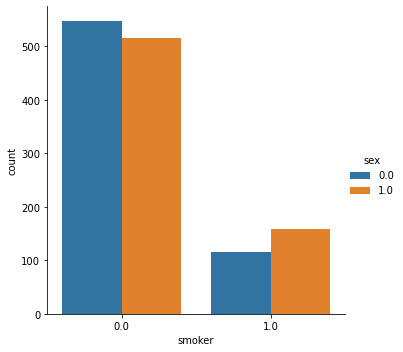

In [258]:
plt.figure(figsize=(30,30))
sns.catplot(x="smoker", kind="count", hue="sex", data=df);

In [259]:
df.corr()["charges"].drop("charges").sort_values(ascending=False)

smoker      0.787234
age         0.298308
bmi         0.198401
children    0.067389
sex         0.058044
region     -0.006547
Name: charges, dtype: float64

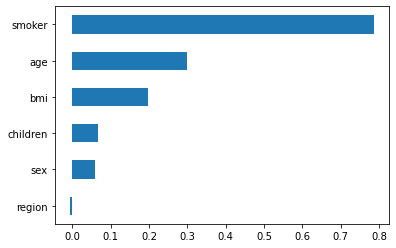

In [260]:
df.corr()["charges"].drop("charges").sort_values().plot.barh();

<IPython.core.display.Javascript object>

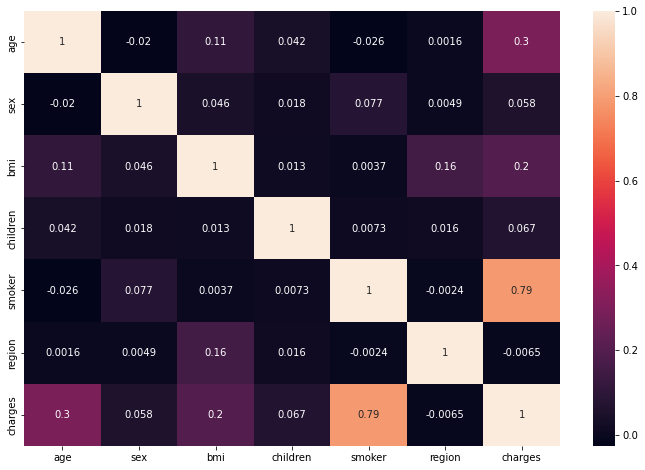

In [261]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True);

### multicolineartiy

In [262]:
for i in df.columns.drop("charges"):
    if df.charges.corr(df[i])>=0.70 or df.charges.corr(df[i])<=-0.70:
        print(i,"and charges corr:", df.charges.corr(df[i]))

smoker and charges corr: 0.7872343672800318


## Modelling

### 1.Linear Regression

In [263]:
X=df.drop("charges", axis=1)
y=df.charges

In [264]:
from sklearn.model_selection import train_test_split

In [265]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42)

In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
model=LinearRegression()

In [83]:
model.fit(X_train, y_train)

LinearRegression()

In [84]:
y_pred=model.predict(X_test)

In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [86]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [87]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.7724652729621758
MAE 		: 4182.803777070157
MSE 		: 38935221.010640755
RMSE 		: 6239.809372940872


In [370]:
r2_score_linear = r2_score(y_test, y_pred)
r2_score_linear 

0.7724652729621758

### 2.Polinomial Regression(Ridge,Lasso, Elastik_net)

In [104]:
from sklearn.preprocessing import PolynomialFeatures

In [132]:
polynomial_converter = PolynomialFeatures(degree=3, include_bias=False)

poly_features = polynomial_converter.fit_transform(X)

In [133]:
poly_features.shape

(1337, 83)

In [134]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [135]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler()

In [136]:
X_train_scaled=scaler.fit_transform(X_train)

In [137]:
X_test_scaled=scaler.transform(X_test)

In [138]:
from sklearn.linear_model import LinearRegression
model_pol=LinearRegression()

In [139]:
model_pol.fit(X_train_scaled, y_train)

LinearRegression()

In [140]:
y_test_pred_pol=model_pol.predict(X_test_scaled)
y_train_pred_pol=model_pol.predict(X_train_scaled)

In [141]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, model_name):
    
    scores = {model_name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    model_name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [151]:
r2_score_pol=r2_score(y_test, y_test_pred_pol)
r2_score_pol

0.8433935354449535

In [142]:
train_val(y_train,y_train_pred_pol, y_test, y_test_pred_pol, "model_pol" )

,model_pol_train,model_pol_test
R2,8.516441e-01,8.433935e-01
mae,2.728671e+03,3.163281e+03
mse,2.014535e+07,2.679814e+07
rmse,4.488357e+03,5.176692e+03


### cv with polinomial

In [143]:
from sklearn.model_selection import cross_validate, cross_val_score

In [144]:
model_pol=LinearRegression()
model = LinearRegression()
scores = cross_validate(model_pol, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 10)

In [145]:
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()

test_r2                             8.189078e-01
test_neg_mean_absolute_error       -3.011775e+03
test_neg_mean_squared_error        -2.381277e+07
test_neg_root_mean_squared_error   -4.861644e+03
dtype: float64

### 2.1. Ridge

In [146]:
from sklearn.linear_model import Ridge

In [147]:
ridge_model=Ridge(alpha=1)

In [148]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1)

In [149]:
y_pred_test_ridge=ridge_model.predict(X_test_scaled)
y_pred_train_ridge=ridge_model.predict(X_train_scaled)

In [153]:
train_val(y_train, y_pred_train_ridge, y_test, y_pred_test_ridge, "ridge_model")

,ridge_model_train,ridge_model_test
R2,8.488131e-01,8.451842e-01
mae,2.762971e+03,3.104481e+03
mse,2.052978e+07,2.649173e+07
rmse,4.530979e+03,5.147012e+03


In [154]:
r2_score_pol_ridge=r2_score(y_test, y_pred_test_ridge)
r2_score_pol_ridge

0.8451841700801854

### gridSearch for Ridge

In [155]:
from sklearn.model_selection import GridSearchCV

In [162]:
alpha_space = np.linspace(0.01, 4, 100)
alpha_space

array([0.01      , 0.05030303, 0.09060606, 0.13090909, 0.17121212,
       0.21151515, 0.25181818, 0.29212121, 0.33242424, 0.37272727,
       0.4130303 , 0.45333333, 0.49363636, 0.53393939, 0.57424242,
       0.61454545, 0.65484848, 0.69515152, 0.73545455, 0.77575758,
       0.81606061, 0.85636364, 0.89666667, 0.9369697 , 0.97727273,
       1.01757576, 1.05787879, 1.09818182, 1.13848485, 1.17878788,
       1.21909091, 1.25939394, 1.29969697, 1.34      , 1.38030303,
       1.42060606, 1.46090909, 1.50121212, 1.54151515, 1.58181818,
       1.62212121, 1.66242424, 1.70272727, 1.7430303 , 1.78333333,
       1.82363636, 1.86393939, 1.90424242, 1.94454545, 1.98484848,
       2.02515152, 2.06545455, 2.10575758, 2.14606061, 2.18636364,
       2.22666667, 2.2669697 , 2.30727273, 2.34757576, 2.38787879,
       2.42818182, 2.46848485, 2.50878788, 2.54909091, 2.58939394,
       2.62969697, 2.67      , 2.71030303, 2.75060606, 2.79090909,
       2.83121212, 2.87151515, 2.91181818, 2.95212121, 2.99242

In [163]:
ridge_model_grid = Ridge()

In [164]:
param_grid = {"alpha":alpha_space}

In [165]:
grid_ridge = GridSearchCV(estimator = ridge_model_grid, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [166]:
grid_ridge.fit(X_train_scaled, y_train) 

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END ..........................alpha=0.05030303030303031; total time=   0.0s
[CV] END ..........................alpha=0.0

[CV] END ...........................alpha=0.4130303030303031; total time=   0.0s
[CV] END ...........................alpha=0.4130303030303031; total time=   0.0s
[CV] END ...........................alpha=0.4130303030303031; total time=   0.0s
[CV] END ...........................alpha=0.4130303030303031; total time=   0.0s
[CV] END ...........................alpha=0.4130303030303031; total time=   0.0s
[CV] END ...........................alpha=0.4130303030303031; total time=   0.0s
[CV] END ...........................alpha=0.4130303030303031; total time=   0.0s
[CV] END ..........................alpha=0.45333333333333337; total time=   0.0s
[CV] END ..........................alpha=0.45333333333333337; total time=   0.0s
[CV] END ..........................alpha=0.45333333333333337; total time=   0.0s
[CV] END ..........................alpha=0.45333333333333337; total time=   0.0s
[CV] END ..........................alpha=0.45333333333333337; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=0.8563636363636364; total time=   0.0s
[CV] END ...........................alpha=0.8563636363636364; total time=   0.0s
[CV] END ...........................alpha=0.8563636363636364; total time=   0.0s
[CV] END ...........................alpha=0.8563636363636364; total time=   0.0s
[CV] END ...........................alpha=0.8966666666666667; total time=   0.0s
[CV] END ...........................alpha=0.8966666666666667; total time=   0.0s
[CV] END ...........................alpha=0.8966666666666667; total time=   0.0s
[CV] END ...........................alpha=0.8966666666666667; total time=   0.0s
[CV] END ...........................alpha=0.8966666666666667; total time=   0.0s
[CV] END ...........................alpha=0.8966666666666667; total time=   0.0s
[CV] END ...........................alpha=0.8966666666666667; total time=   0.0s
[CV] END ...........................alpha=0.8966666666666667; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=1.34; total time=   0.0s
[CV] END .........................................alpha=1.34; total time=   0.0s
[CV] END .........................................alpha=1.34; total time=   0.0s
[CV] END .........................................alpha=1.34; total time=   0.0s
[CV] END .........................................alpha=1.34; total time=   0.0s
[CV] END .........................................alpha=1.34; total time=   0.0s
[CV] END ...........................alpha=1.3803030303030304; total time=   0.0s
[CV] END ...........................alpha=1.3803030303030304; total time=   0.0s
[CV] END ...........................alpha=1.3803030303030304; total time=   0.0s
[CV] END ...........................alpha=1.3803030303030304; total time=   0.0s
[CV] END ...........................alpha=1.3803030303030304; total time=   0.0s
[CV] END ...........................alpha=1.3803030303030304; total time=   0.0s
[CV] END ...................

[CV] END ............................alpha=1.863939393939394; total time=   0.0s
[CV] END ............................alpha=1.863939393939394; total time=   0.0s
[CV] END ............................alpha=1.863939393939394; total time=   0.0s
[CV] END ............................alpha=1.863939393939394; total time=   0.0s
[CV] END ............................alpha=1.863939393939394; total time=   0.0s
[CV] END ............................alpha=1.863939393939394; total time=   0.0s
[CV] END ............................alpha=1.863939393939394; total time=   0.0s
[CV] END ...........................alpha=1.9042424242424243; total time=   0.0s
[CV] END ...........................alpha=1.9042424242424243; total time=   0.0s
[CV] END ...........................alpha=1.9042424242424243; total time=   0.0s
[CV] END ...........................alpha=1.9042424242424243; total time=   0.0s
[CV] END ...........................alpha=1.9042424242424243; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=2.3878787878787877; total time=   0.0s
[CV] END ...........................alpha=2.3878787878787877; total time=   0.0s
[CV] END ...........................alpha=2.3878787878787877; total time=   0.0s
[CV] END ...........................alpha=2.3878787878787877; total time=   0.0s
[CV] END ...........................alpha=2.3878787878787877; total time=   0.0s
[CV] END ...........................alpha=2.3878787878787877; total time=   0.0s
[CV] END ...........................alpha=2.3878787878787877; total time=   0.0s
[CV] END ............................alpha=2.428181818181818; total time=   0.0s
[CV] END ............................alpha=2.428181818181818; total time=   0.0s
[CV] END ............................alpha=2.428181818181818; total time=   0.0s
[CV] END ............................alpha=2.428181818181818; total time=   0.0s
[CV] END ............................alpha=2.428181818181818; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=2.8715151515151516; total time=   0.0s
[CV] END ...........................alpha=2.8715151515151516; total time=   0.0s
[CV] END ...........................alpha=2.8715151515151516; total time=   0.0s
[CV] END ...........................alpha=2.8715151515151516; total time=   0.0s
[CV] END ...........................alpha=2.8715151515151516; total time=   0.0s
[CV] END ...........................alpha=2.8715151515151516; total time=   0.0s
[CV] END ...........................alpha=2.8715151515151516; total time=   0.0s
[CV] END ...........................alpha=2.8715151515151516; total time=   0.0s
[CV] END ...........................alpha=2.9118181818181816; total time=   0.0s
[CV] END ...........................alpha=2.9118181818181816; total time=   0.0s
[CV] END ...........................alpha=2.9118181818181816; total time=   0.0s
[CV] END ...........................alpha=2.9118181818181816; total time=   0.0s
[CV] END ...................

[CV] END ............................alpha=3.355151515151515; total time=   0.0s
[CV] END ............................alpha=3.355151515151515; total time=   0.0s
[CV] END ............................alpha=3.355151515151515; total time=   0.0s
[CV] END ............................alpha=3.355151515151515; total time=   0.0s
[CV] END ............................alpha=3.355151515151515; total time=   0.0s
[CV] END ............................alpha=3.355151515151515; total time=   0.0s
[CV] END ............................alpha=3.355151515151515; total time=   0.0s
[CV] END ............................alpha=3.355151515151515; total time=   0.0s
[CV] END ............................alpha=3.355151515151515; total time=   0.0s
[CV] END ...........................alpha=3.3954545454545455; total time=   0.0s
[CV] END ...........................alpha=3.3954545454545455; total time=   0.0s
[CV] END ...........................alpha=3.3954545454545455; total time=   0.0s
[CV] END ...................

[CV] END ............................alpha=3.879090909090909; total time=   0.0s
[CV] END ............................alpha=3.879090909090909; total time=   0.0s
[CV] END ............................alpha=3.879090909090909; total time=   0.0s
[CV] END ............................alpha=3.879090909090909; total time=   0.0s
[CV] END ............................alpha=3.879090909090909; total time=   0.0s
[CV] END ............................alpha=3.879090909090909; total time=   0.0s
[CV] END ...........................alpha=3.9193939393939394; total time=   0.0s
[CV] END ...........................alpha=3.9193939393939394; total time=   0.0s
[CV] END ...........................alpha=3.9193939393939394; total time=   0.0s
[CV] END ...........................alpha=3.9193939393939394; total time=   0.0s
[CV] END ...........................alpha=3.9193939393939394; total time=   0.0s
[CV] END ...........................alpha=3.9193939393939394; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([0.01      , 0.05030303, 0.09060606, 0.13090909, 0.17121212,
       0.21151515, 0.25181818, 0.29212121, 0.33242424, 0.37272727,
       0.4130303 , 0.45333333, 0.49363636, 0.53393939, 0.57424242,
       0.61454545, 0.65484848, 0.69515152, 0.73545455, 0.77575758,
       0.81606061, 0.85636364, 0.89666667, 0.9369697 , 0.97727273,
       1.01757576, 1.057878...
       2.83121212, 2.87151515, 2.91181818, 2.95212121, 2.99242424,
       3.03272727, 3.0730303 , 3.11333333, 3.15363636, 3.19393939,
       3.23424242, 3.27454545, 3.31484848, 3.35515152, 3.39545455,
       3.43575758, 3.47606061, 3.51636364, 3.55666667, 3.5969697 ,
       3.63727273, 3.67757576, 3.71787879, 3.75818182, 3.79848485,
       3.83878788, 3.87909091, 3.91939394, 3.95969697, 4.        ])},
             scoring='neg_root_mean_squared_error', verbose=2)

In [167]:
grid_ridge.best_params_

{'alpha': 4.0}

In [168]:
y_pred_test_ridge_g = grid_ridge.predict(X_test_scaled)
y_pred_train_ridge_g= grid_ridge.predict(X_train_scaled)

In [169]:
train_val(y_train, y_pred_train_ridge_g, y_test, y_pred_test_ridge_g, "grid_ridge")

,grid_ridge_train,grid_ridge_test
R2,8.460232e-01,8.467887e-01
mae,2.798174e+03,3.080088e+03
mse,2.090862e+07,2.621716e+07
rmse,4.572594e+03,5.120270e+03


In [170]:
r2_score_pol_ridge_g=r2_score(y_test, y_pred_test_ridge_g)
r2_score_pol_ridge_g

0.8467887371155678

### 2.2. Lasso and GridSearch

In [171]:
from sklearn.linear_model import Lasso

In [175]:
lasso_model=Lasso(max_iter=100000)

In [176]:
param_grid = {"alpha":alpha_space}

In [177]:
grid_lasso = GridSearchCV(estimator = lasso_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [178]:
grid_lasso.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END .........................................alpha=0.01; total time=   6.9s
[CV] END .........................................alpha=0.01; total time=   6.5s
[CV] END .........................................alpha=0.01; total time=   6.5s
[CV] END .........................................alpha=0.01; total time=   6.4s
[CV] END .........................................alpha=0.01; total time=   6.3s
[CV] END .........................................alpha=0.01; total time=   5.8s
[CV] END .........................................alpha=0.01; total time=   5.7s
[CV] END .........................................alpha=0.01; total time=   6.1s
[CV] END .........................................alpha=0.01; total time=   5.9s
[CV] END .........................................alpha=0.01; total time=   6.3s
[CV] END ..........................alpha=0.05030303030303031; total time=   5.8s
[CV] END ..........................alpha=0.0

[CV] END ...........................alpha=0.4130303030303031; total time=   1.7s
[CV] END ...........................alpha=0.4130303030303031; total time=   2.4s
[CV] END ...........................alpha=0.4130303030303031; total time=   2.2s
[CV] END ...........................alpha=0.4130303030303031; total time=   1.8s
[CV] END ...........................alpha=0.4130303030303031; total time=   3.1s
[CV] END ...........................alpha=0.4130303030303031; total time=   2.3s
[CV] END ...........................alpha=0.4130303030303031; total time=   2.2s
[CV] END ...........................alpha=0.4130303030303031; total time=   1.9s
[CV] END ...........................alpha=0.4130303030303031; total time=   1.5s
[CV] END ..........................alpha=0.45333333333333337; total time=   1.9s
[CV] END ..........................alpha=0.45333333333333337; total time=   2.1s
[CV] END ..........................alpha=0.45333333333333337; total time=   1.8s
[CV] END ...................

[CV] END ...........................alpha=0.8160606060606062; total time=   1.4s
[CV] END ...........................alpha=0.8160606060606062; total time=   1.3s
[CV] END ...........................alpha=0.8160606060606062; total time=   1.2s
[CV] END ...........................alpha=0.8160606060606062; total time=   1.5s
[CV] END ...........................alpha=0.8160606060606062; total time=   1.3s
[CV] END ...........................alpha=0.8160606060606062; total time=   1.4s
[CV] END ...........................alpha=0.8160606060606062; total time=   1.2s
[CV] END ...........................alpha=0.8563636363636364; total time=   1.3s
[CV] END ...........................alpha=0.8563636363636364; total time=   1.2s
[CV] END ...........................alpha=0.8563636363636364; total time=   1.4s
[CV] END ...........................alpha=0.8563636363636364; total time=   1.4s
[CV] END ...........................alpha=0.8563636363636364; total time=   1.3s
[CV] END ...................

[CV] END ...........................alpha=1.2190909090909092; total time=   0.8s
[CV] END ...........................alpha=1.2190909090909092; total time=   1.1s
[CV] END ...........................alpha=1.2190909090909092; total time=   1.3s
[CV] END ...........................alpha=1.2190909090909092; total time=   1.1s
[CV] END ...........................alpha=1.2190909090909092; total time=   1.0s
[CV] END ...........................alpha=1.2593939393939395; total time=   0.9s
[CV] END ...........................alpha=1.2593939393939395; total time=   0.7s
[CV] END ...........................alpha=1.2593939393939395; total time=   1.1s
[CV] END ...........................alpha=1.2593939393939395; total time=   1.0s
[CV] END ...........................alpha=1.2593939393939395; total time=   1.1s
[CV] END ...........................alpha=1.2593939393939395; total time=   0.7s
[CV] END ...........................alpha=1.2593939393939395; total time=   1.1s
[CV] END ...................

[CV] END ...........................alpha=1.6221212121212123; total time=   0.9s
[CV] END ...........................alpha=1.6221212121212123; total time=   0.9s
[CV] END ...........................alpha=1.6221212121212123; total time=   0.8s
[CV] END ...........................alpha=1.6624242424242426; total time=   0.7s
[CV] END ...........................alpha=1.6624242424242426; total time=   0.5s
[CV] END ...........................alpha=1.6624242424242426; total time=   0.8s
[CV] END ...........................alpha=1.6624242424242426; total time=   0.5s
[CV] END ...........................alpha=1.6624242424242426; total time=   0.8s
[CV] END ...........................alpha=1.6624242424242426; total time=   0.4s
[CV] END ...........................alpha=1.6624242424242426; total time=   0.8s
[CV] END ...........................alpha=1.6624242424242426; total time=   0.9s
[CV] END ...........................alpha=1.6624242424242426; total time=   0.9s
[CV] END ...................

[CV] END ............................alpha=2.025151515151515; total time=   1.0s
[CV] END ...........................alpha=2.0654545454545454; total time=   0.4s
[CV] END ...........................alpha=2.0654545454545454; total time=   0.6s
[CV] END ...........................alpha=2.0654545454545454; total time=   0.3s
[CV] END ...........................alpha=2.0654545454545454; total time=   0.5s
[CV] END ...........................alpha=2.0654545454545454; total time=   0.3s
[CV] END ...........................alpha=2.0654545454545454; total time=   0.5s
[CV] END ...........................alpha=2.0654545454545454; total time=   0.5s
[CV] END ...........................alpha=2.0654545454545454; total time=   0.5s
[CV] END ...........................alpha=2.0654545454545454; total time=   0.6s
[CV] END ...........................alpha=2.0654545454545454; total time=   1.0s
[CV] END ...........................alpha=2.1057575757575755; total time=   0.4s
[CV] END ...................

[CV] END ...........................alpha=2.4684848484848483; total time=   0.5s
[CV] END ...........................alpha=2.4684848484848483; total time=   0.3s
[CV] END ...........................alpha=2.4684848484848483; total time=   0.4s
[CV] END ...........................alpha=2.4684848484848483; total time=   0.2s
[CV] END ...........................alpha=2.4684848484848483; total time=   0.4s
[CV] END ...........................alpha=2.4684848484848483; total time=   0.4s
[CV] END ...........................alpha=2.4684848484848483; total time=   0.3s
[CV] END ...........................alpha=2.4684848484848483; total time=   0.3s
[CV] END ...........................alpha=2.4684848484848483; total time=   0.5s
[CV] END ............................alpha=2.508787878787879; total time=   0.4s
[CV] END ............................alpha=2.508787878787879; total time=   0.5s
[CV] END ............................alpha=2.508787878787879; total time=   0.3s
[CV] END ...................

[CV] END ...........................alpha=2.8715151515151516; total time=   0.2s
[CV] END ...........................alpha=2.8715151515151516; total time=   0.2s
[CV] END ...........................alpha=2.8715151515151516; total time=   0.3s
[CV] END ...........................alpha=2.8715151515151516; total time=   0.3s
[CV] END ...........................alpha=2.8715151515151516; total time=   0.2s
[CV] END ...........................alpha=2.8715151515151516; total time=   0.2s
[CV] END ...........................alpha=2.8715151515151516; total time=   0.3s
[CV] END ...........................alpha=2.9118181818181816; total time=   0.3s
[CV] END ...........................alpha=2.9118181818181816; total time=   0.4s
[CV] END ...........................alpha=2.9118181818181816; total time=   0.2s
[CV] END ...........................alpha=2.9118181818181816; total time=   0.2s
[CV] END ...........................alpha=2.9118181818181816; total time=   0.2s
[CV] END ...................

[CV] END ...........................alpha=3.2745454545454544; total time=   0.4s
[CV] END ...........................alpha=3.2745454545454544; total time=   0.2s
[CV] END ...........................alpha=3.2745454545454544; total time=   0.2s
[CV] END ...........................alpha=3.2745454545454544; total time=   0.2s
[CV] END ...........................alpha=3.2745454545454544; total time=   0.3s
[CV] END ............................alpha=3.314848484848485; total time=   0.3s
[CV] END ............................alpha=3.314848484848485; total time=   0.3s
[CV] END ............................alpha=3.314848484848485; total time=   0.2s
[CV] END ............................alpha=3.314848484848485; total time=   0.2s
[CV] END ............................alpha=3.314848484848485; total time=   0.2s
[CV] END ............................alpha=3.314848484848485; total time=   0.3s
[CV] END ............................alpha=3.314848484848485; total time=   0.2s
[CV] END ...................

[CV] END ...........................alpha=3.6775757575757577; total time=   0.2s
[CV] END ...........................alpha=3.6775757575757577; total time=   0.3s
[CV] END ............................alpha=3.717878787878788; total time=   0.3s
[CV] END ............................alpha=3.717878787878788; total time=   0.3s
[CV] END ............................alpha=3.717878787878788; total time=   0.2s
[CV] END ............................alpha=3.717878787878788; total time=   0.2s
[CV] END ............................alpha=3.717878787878788; total time=   0.2s
[CV] END ............................alpha=3.717878787878788; total time=   0.3s
[CV] END ............................alpha=3.717878787878788; total time=   0.2s
[CV] END ............................alpha=3.717878787878788; total time=   0.2s
[CV] END ............................alpha=3.717878787878788; total time=   0.2s
[CV] END ............................alpha=3.717878787878788; total time=   0.3s
[CV] END ...................

GridSearchCV(cv=10, estimator=Lasso(max_iter=100000),
             param_grid={'alpha': array([0.01      , 0.05030303, 0.09060606, 0.13090909, 0.17121212,
       0.21151515, 0.25181818, 0.29212121, 0.33242424, 0.37272727,
       0.4130303 , 0.45333333, 0.49363636, 0.53393939, 0.57424242,
       0.61454545, 0.65484848, 0.69515152, 0.73545455, 0.77575758,
       0.81606061, 0.85636364, 0.89666667, 0.9369697 , 0.97727273,
       1.01...
       2.83121212, 2.87151515, 2.91181818, 2.95212121, 2.99242424,
       3.03272727, 3.0730303 , 3.11333333, 3.15363636, 3.19393939,
       3.23424242, 3.27454545, 3.31484848, 3.35515152, 3.39545455,
       3.43575758, 3.47606061, 3.51636364, 3.55666667, 3.5969697 ,
       3.63727273, 3.67757576, 3.71787879, 3.75818182, 3.79848485,
       3.83878788, 3.87909091, 3.91939394, 3.95969697, 4.        ])},
             scoring='neg_root_mean_squared_error', verbose=2)

In [179]:
grid_lasso.best_params_

{'alpha': 4.0}

In [180]:
y_test_pred_lasso_g = grid_lasso.predict(X_test_scaled)
y_train_pred_lasso_g = grid_lasso.predict(X_train_scaled)

In [181]:
train_val(y_train, y_train_pred_lasso_g, y_test, y_test_pred_lasso_g, "grid_lasso")

,grid_lasso_train,grid_lasso_test
R2,8.483424e-01,8.482697e-01
mae,2.763424e+03,3.064867e+03
mse,2.059370e+07,2.596375e+07
rmse,4.538028e+03,5.095464e+03


In [184]:
r2_score_pol_lasso_g=r2_score(y_test, y_test_pred_lasso_g)
r2_score_pol_lasso_g

0.8482696519736357

## 3.Decision Tree

In [273]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [274]:
dt_model=DecisionTreeRegressor(random_state=42)

In [275]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [277]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [278]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [279]:
train_val(dt_model, X_train, y_train, X_test, y_test) # overfitting

,train,test
R2,1.0,7.681042e-01
mae,0.0,2.881550e+03
mse,0.0,3.968148e+07
rmse,0.0,6.299324e+03


### GridSearch & DT

In [281]:
from sklearn.model_selection import GridSearchCV

In [282]:
dt_model=DecisionTreeRegressor(random_state=42)

In [283]:
param_grid={"splitter":["best", "random"],
            "max_depth": [None, 4, 5, 6, 7,8,9,10],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6,7],
             "min_samples_split": [2, 3, 5, 6, 7,8,9]}

In [284]:
grid_model_dt=GridSearchCV(estimator=dt_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10)

In [285]:
grid_model_dt.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [None, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             scoring='neg_root_mean_squared_error')

In [289]:
y_test_pred_dt=grid_model_dt.predict(X_test)

In [286]:
grid_model_dt.best_estimator_

DecisionTreeRegressor(max_depth=4, min_samples_leaf=3, random_state=42)

In [287]:
train_val(grid_model_dt, X_train, y_train, X_test, y_test)

,train,test
R2,8.630805e-01,8.663229e-01
mae,2.441658e+03,2.730234e+03
mse,1.859239e+07,2.287451e+07
rmse,4.311889e+03,4.782731e+03


In [290]:
r2_score_dt_g=r2_score(y_test, y_test_pred_dt)
r2_score_dt_g

0.8663229414145717

### 4.Random Forest

In [291]:
from sklearn.ensemble import RandomForestRegressor

In [292]:
rf_model=RandomForestRegressor(random_state=42)

In [293]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [294]:
y_test_pred_rf=rf_model.predict(X_test)

In [295]:
train_val(rf_model, X_train, y_train, X_test, y_test)

,train,test
R2,9.741910e-01,8.633459e-01
mae,1.023650e+03,2.625360e+03
mse,3.504625e+06,2.338394e+07
rmse,1.872064e+03,4.835694e+03


### GridSearch & RF

In [298]:
param_grid = {"n_estimators":[200, 500],
              "max_depth": [None, 4, 5, 6, 7,8],
              "min_samples_leaf": [1, 2, 3, 4],
              "min_samples_split": [2, 3, 5, 6],
              "max_features":['auto', X.shape[1]/3, 2, 4]}

In [299]:

grid_model = GridSearchCV(estimator=rf_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10)

In [300]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 2.0, 2, 4],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 5, 6],
                         'n_estimators': [200, 500]},
             scoring='neg_root_mean_squared_error')

In [301]:
grid_model.best_estimator_

RandomForestRegressor(max_depth=5, max_features=4, min_samples_leaf=4,
                      n_estimators=500, random_state=42)

In [302]:
y_test_pred_rf_g=grid_model.predict(X_test)

In [303]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,8.793147e-01,8.758973e-01
mae,2.220655e+03,2.539146e+03
mse,1.638795e+07,2.123616e+07
rmse,4.048203e+03,4.608271e+03


In [304]:
r2_score_rf_g=r2_score(y_test, y_test_pred_rf_g)
r2_score_rf_g

0.8758973404700698

### 5.AdaBoosting

In [305]:
from sklearn.ensemble import AdaBoostRegressor

In [306]:
model_ada=AdaBoostRegressor(random_state=42, n_estimators=50)

In [307]:
model_ada.fit(X_train, y_train)

AdaBoostRegressor(random_state=42)

In [308]:
train_val(model_ada, X_train, y_train, X_test, y_test)

,train,test
R2,8.436309e-01,8.541118e-01
mae,3.412030e+03,3.600215e+03
mse,2.123347e+07,2.496405e+07
rmse,4.607979e+03,4.996404e+03


### GridSearch & Adaboosting

In [324]:
param_grid = {"n_estimators":[20,50, 100],
              "learning_rate":[0.01, 0.1, 0.5],
              "loss": ["linear", "square"]
            }

In [325]:
model_ada = AdaBoostRegressor(random_state=101)
grid_model_ada = GridSearchCV(estimator=model_ada,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10)

In [326]:
grid_model_ada.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=AdaBoostRegressor(random_state=101),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'loss': ['linear', 'square'],
                         'n_estimators': [20, 50, 100]},
             scoring='neg_root_mean_squared_error')

In [327]:
grid_model_ada.best_params_

{'learning_rate': 0.01, 'loss': 'square', 'n_estimators': 20}

In [328]:
train_val(grid_model_ada, X_train, y_train, X_test, y_test)

,train,test
R2,8.531352e-01,8.616950e-01
mae,2.666878e+03,2.918528e+03
mse,1.994287e+07,2.366643e+07
rmse,4.465744e+03,4.864816e+03


In [329]:
y_test_pred_ada_g=grid_model_ada.predict(X_test)


In [342]:
r2_score_ada_g=r2_score(y_test, y_test_pred_ada_g)
r2_score_ada_g

0.8616950257122369

### 6. XGBoost Regressor

In [331]:
from xgboost import XGBRegressor

In [332]:
model_xgb=XGBRegressor(random_state=42, objective="reg:squarederror")

In [333]:
model_xgb.fit(X_train, y_train)

XGBRegressor(objective='reg:squarederror', random_state=42)

In [334]:
train_val(model_xgb, X_train, y_train, X_test, y_test)

,train,test
R2,8.977032e-01,8.731775e-01
mae,2.029216e+03,2.582870e+03
mse,1.389096e+07,2.170157e+07
rmse,3.727057e+03,4.658495e+03


### GridSearch & XGBoost

In [337]:
param_grid = {"n_estimators":[100, 300,500],'max_depth':[3,5,6,7], "learning_rate": [0.05, 0.1, 0.2],
             "subsample":[0.5, 1], "colsample_bytree":[0.5, 1]}
model_xgb = XGBRegressor(random_state=42, objective="reg:squarederror")
grid_model_xgb = GridSearchCV(estimator=model_xgb,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10)

In [338]:
grid_model_xgb.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(objective='reg:squarederror',
                                    random_state=42),
             param_grid={'colsample_bytree': [0.5, 1],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 6, 7],
                         'n_estimators': [100, 300, 500],
                         'subsample': [0.5, 1]},
             scoring='neg_root_mean_squared_error')

In [373]:
grid_model_xgb.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.05,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 0.5}

In [339]:
train_val(grid_model_xgb, X_train, y_train, X_test, y_test)

,train,test
R2,8.805096e-01,8.736685e-01
mae,2.182536e+03,2.540618e+03
mse,1.622569e+07,2.161756e+07
rmse,4.028112e+03,4.649468e+03


In [340]:
y_test_pred_xgb_g=grid_model_xgb.predict(X_test)

In [341]:
r2_score_xgb_g=r2_score(y_test, y_test_pred_xgb_g)
r2_score_xgb_g

0.8736685029033159

### 7. PCA & XGBoost

### PCA

In [343]:
X_train_scaled_pca=scaler.fit_transform(X_train)

In [344]:
X_test_scaled_pca=scaler.transform(X_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

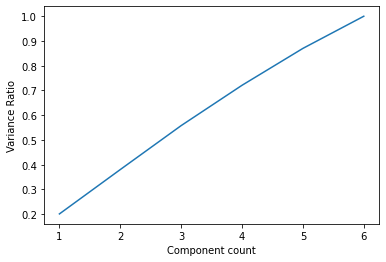

In [347]:
from sklearn.decomposition import PCA
pca=PCA().fit(X_train_scaled_pca)
x=range(1,7)
plt.plot(x,np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Component count")
plt.ylabel("Variance Ratio");

In [350]:
pca=PCA(n_components=6).fit(X_train_scaled_pca)

In [351]:
my_dict = {"explained_variance":pca.explained_variance_, 
           "explained_variance_ratio":pca.explained_variance_ratio_,
           "cumsum_explained_variance_ratio":pca.explained_variance_ratio_.cumsum()}

In [352]:
df_ev = pd.DataFrame(my_dict, index = range(1,7))
df_ev

,explained_variance,explained_variance_ratio,cumsum_explained_variance_ratio
1,1.207118,0.200971,0.200971
2,1.077145,0.179332,0.380303
3,1.067191,0.177675,0.557978
4,0.978998,0.162992,0.720970
5,0.895453,0.149083,0.870053
6,0.780518,0.129947,1.000000


In [353]:
pca=PCA(n_components=4)

In [354]:
X_train_pca=pca.fit_transform(X_train_scaled_pca)
X_test_pca=pca.transform(X_test_scaled_pca)

In [355]:
df_pca_train = pd.DataFrame(X_train_pca)
df_pca_train = df_pca_train.rename(columns={0:"first_component", 1:"second_component", 2:"third_component",3 :"fourth_component"})
df_pca_train.head()

,first_component,second_component,third_component,fourth_component
0,-0.945670,0.887746,-1.497842,1.147560
1,0.918956,1.383448,1.019736,-1.141145
2,-1.020033,0.998368,2.549698,0.966273
3,-0.521462,0.639146,1.970020,-0.283636
4,-0.836165,1.723156,1.709156,0.642919


In [356]:
df_pca_test=pd.DataFrame(X_test_pca)
df_pca_test = df_pca_test.rename(columns={0:"first_component", 1:"second_component", 2:"third_component", 3 :"fourth_component"})
df_pca_test.head()

,first_component,second_component,third_component,fourth_component
0,1.332837,0.326320,-0.497357,-1.887983
1,-0.079351,0.116279,-0.946366,2.557202
2,-0.873464,1.105904,-1.522622,0.757515
3,0.612035,1.841613,1.541131,1.085979
4,-1.035980,0.405482,0.738619,-0.014652


### modelling XGBoost after PCA

In [364]:
classifier4 = XGBRegressor(max_depth=3,random_state=42, objective="reg:squarederror" )
classifier4.fit(X_train_pca, y_train)
train_val(classifier4, X_train_pca, y_train, X_test_pca, y_test)

,train,test
R2,7.380765e-01,5.239609e-01
mae,4.045690e+03,5.764165e+03
mse,3.556677e+07,8.145872e+07
rmse,5.963788e+03,9.025448e+03


In [366]:
y_test_pred_pca=classifier4.predict(X_test_pca)

In [369]:
r2_score_pca_rf=r2_score(y_test, y_test_pred_pca)
r2_score_pca_rf

0.523960901416841

### 8. Feature İmportance with XGBoost

In [376]:
model_feat = XGBRegressor(random_state=42, objective="reg:squarederror",learning_rate=0.05, max_dept=3, subsample=0.5, colsample_bytree=1
                    ,n_estimators=100)
model_feat.fit(X_train, y_train)

XGBRegressor(learning_rate=0.05, max_dept=3, objective='reg:squarederror',
             random_state=42, subsample=0.5)

In [378]:
model_feat.feature_importances_

array([0.05445554, 0.01335729, 0.08569247, 0.02313679, 0.80507576,
       0.01828221], dtype=float32)

In [379]:
imp_feats = pd.DataFrame(index=X.columns,data=model_feat.feature_importances_,columns=['xgb_Importance'])
xgb_imp_feats = imp_feats.sort_values('xgb_Importance')
xgb_imp_feats

,xgb_Importance
sex,0.013357
region,0.018282
children,0.023137
age,0.054456
bmi,0.085692
smoker,0.805076


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

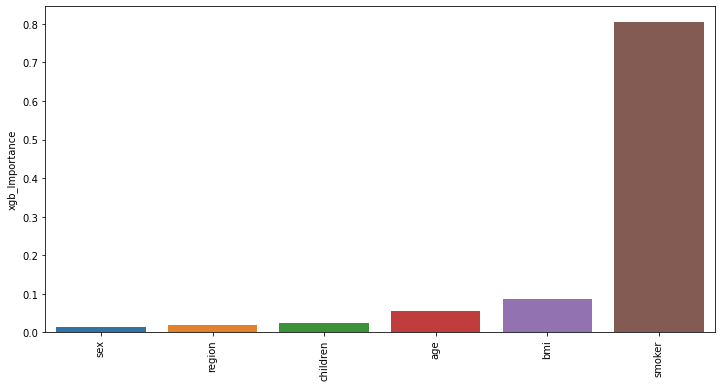

In [380]:
plt.figure(figsize=(12,6))
sns.barplot(data=xgb_imp_feats, x=xgb_imp_feats.index, y='xgb_Importance')

plt.xticks(rotation=90);

### New_model

In [381]:
X_new=df[["smoker","bmi","age"]]

In [382]:
X_new.head()

,smoker,bmi,age
0,1.0,27.900,19
1,0.0,33.770,18
2,0.0,33.000,28
3,0.0,22.705,33
4,0.0,28.880,32


In [383]:
X_train,X_test, y_train, y_test=train_test_split(X_new, y, test_size=0.1, random_state=42)

In [384]:
model_new=XGBRegressor(random_state=42, objective="reg:squarederror")

In [385]:
model_new.fit(X_train, y_train)

XGBRegressor(objective='reg:squarederror', random_state=42)

In [386]:
train_val(model_new, X_train, y_train, X_test, y_test)

,train,test
R2,8.841323e-01,8.950747e-01
mae,2.255989e+03,2.364565e+03
mse,1.655275e+07,1.883295e+07
rmse,4.068507e+03,4.339695e+03


### GridSearch & new_model

In [388]:
param_grid = {"n_estimators":[100, 300,500],'max_depth':[3,5,6,7], "learning_rate": [0.05, 0.1, 0.2],
             "subsample":[0.5, 1], "colsample_bytree":[0.5, 1]}

In [401]:
model = XGBRegressor(random_state=42, objective="reg:squarederror")
grid_model_new = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10)

In [402]:
grid_model_new.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(objective='reg:squarederror',
                                    random_state=42),
             param_grid={'colsample_bytree': [0.5, 1],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 6, 7],
                         'n_estimators': [100, 300, 500],
                         'subsample': [0.5, 1]},
             scoring='neg_root_mean_squared_error')

In [403]:
grid_model_new.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.05,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 1}

In [404]:
train_val(grid_model_new, X_train, y_train, X_test, y_test)

,train,test
R2,8.715912e-01,8.923331e-01
mae,2.351619e+03,2.378831e+03
mse,1.834435e+07,1.932504e+07
rmse,4.283031e+03,4.396026e+03


In [405]:
y_test_pred_new=grid_model_new.predict(X_test)

In [406]:
r2_score_new_model=r2_score(y_test, y_test_pred_new)
r2_score_new_model

0.8923330788411392

### Compare Models

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

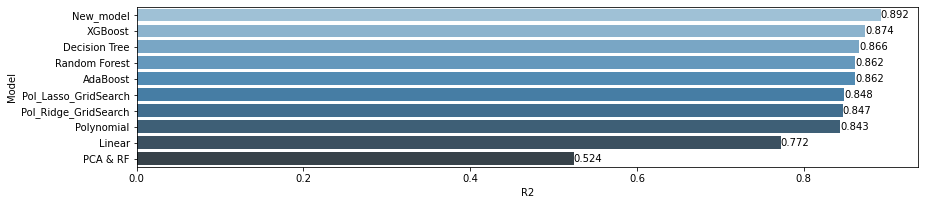

In [407]:
compare = pd.DataFrame({"Model": ["Linear", "Polynomial", "Pol_Ridge_GridSearch","Pol_Lasso_GridSearch", "Decision Tree", "Random Forest", "AdaBoost",
                                  "XGBoost", "PCA & RF", "New_model"],
                        "R2": [r2_score_linear,r2_score_pol, r2_score_pol_ridge_g,r2_score_pol_lasso_g,
                               r2_score_dt_g, r2_score_rf_g, r2_score_ada_g, r2_score_xgb_g, r2_score_pca_rf, r2_score_new_model]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="R2", ascending=False)
ax=sns.barplot(x="R2", y="Model", data=compare, palette="Blues_d")
labels(ax)



### 9.Final Model and Model Deployment

In [427]:
import pickle


In [428]:
final_model=XGBRegressor(objective="reg:squarederror",random_state=42,colsample_bytree= 1,
 learning_rate=0.05,
 max_depth= 3,
n_estimators= 100,
 subsample= 1 ).fit(X_new, y)

In [436]:
pickle.dump(final_model, open("final_model_insurance.pkl", "wb"))
pickle.dump(enc, open("insurance_encoder.pkl","wb"))

In [430]:
my_dict={"smoker":[0,1,1,0],
        "bmi":[39.98,21.98,28.97,42.89],
        "age":[18,45,32,67]}

In [431]:
sample=pd.DataFrame(my_dict)

In [432]:
final_model=pickle.load(open("final_model_insurance","rb"))

In [433]:
predictions = final_model.predict(sample)
predictions

array([ 3396.5415, 22842.19  , 21510.705 , 14367.093 ], dtype=float32)

In [434]:
sample["pred"]=predictions

In [435]:
sample

,smoker,bmi,age,pred
0,0,39.98,18,3396.541504
1,1,21.98,45,22842.189453
2,1,28.97,32,21510.705078
3,0,42.89,67,14367.092773


In [437]:
print(xgb.__version__)

<IPython.core.display.Javascript object>

0.90


In [441]:
df.age.min(), df.age.max()

(18, 64)